# Temepertaure Forecast Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler,power_transform
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

Importing required libraries

In [2]:
df=pd.read_csv('temperature.csv')

Importing dataset

In [3]:
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

Sample data of dataset

In [4]:
df.shape

(7752, 25)

Dataset have 7752 rows and 25 columns

In [5]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

datatypes of dataset most of the datatype are float

In [6]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

There is missing values in dataset we want to treat it

In [7]:
df.nunique()

station               25
Date                 310
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
dtype: int64

Unique values of each column

In [8]:
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7750.000000   7682.000000   7682.000000  7677.000000  7677.000000   
mean     13.000000     29.768211     23.225059    56.759372    88.374804   
std       7.211568      2.969999      2.413961    14.668111     7.192004   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    45.963543    84.222862   
50%      13.000000     29.900000     23.400000    55.039024    89.793480   
75%      19.000000     32.000000     24.900000    67.190056    93.743629   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7677.000000       7677.000000  7677.000000  7677.000000   
mean          29.613447         23.512589     7.097875    62.505019   
std            2.947191          2.345347     2.183836    33.730589   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673499         22.089739     5.678705    37.266753   
50%           29.703426         23.760199     6.547470    56.865482   
75%           31.710450         25.152909     8.032276    84.223616   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7677.000000  ...  7677.000000  7677.000000  7677.000000  7752.000000   
mean      0.368774  ...     0.485003     0.278200     0.269407    37.544722   
std       0.262458  ...     1.762807     1.161809     1.206214     0.050352   
min       0.000000  ...     0.000000     0.000000     0.000000    37.456200   
25%       0.146654  ...     0.000000     0.000000     0.000000    37.510200   
50%       0.315697  ...     0.000000     0.000000     0.000000    37.550700   
75%       0.575489  ...     0.018364     0.007896     0.000041    37.577600   
max       0.967277  ...    21.621661    15.841235    16.655469    37.645000   

               lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7752.000000  7752.000000  7752.000000      7752.000000  7725.000000   
mean    126.991397    61.867972     1.257048      5341.502803    30.274887   
std       0.079435    54.279780     1.370444       429.158867     3.128010   
min     126.826000    12.370000     0.098475      4329.520508    17.400000   
25%     126.937000    28.700000     0.271300      4999.018555    28.200000   
50%     126.995000    45.716000     0.618000      5436.345215    30.500000   
75%     127.042000    59.832400     1.767800      5728.316406    32.600000   
max     127.135000   212.335000     5.178230      5992.895996    38.900000   

         Next_Tmin  
count  7725.000000  
mean     22.932220  
std       2.487613  
min      11.300000  
25%      21.300000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 24 columns]

Statistical Summary of dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


Memory usage of dataset is 1.5 mb

# Treating Missing values

In [10]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

# Mean

In [11]:
df['Present_Tmax']=df['Present_Tmax'].fillna(df['Present_Tmax'].mean())

df['Present_Tmin']=df['Present_Tmin'].fillna(df['Present_Tmin'].mean())

df['LDAPS_RHmin']=df['LDAPS_RHmin'].fillna(df['LDAPS_RHmin'].mean())

df['LDAPS_RHmax']=df['LDAPS_RHmax'].fillna(df['LDAPS_RHmax'].mean())

df['LDAPS_Tmax_lapse']=df['LDAPS_Tmax_lapse'].fillna(df['LDAPS_Tmax_lapse'].mean())

df['LDAPS_Tmin_lapse']=df['LDAPS_Tmin_lapse'].fillna(df['LDAPS_Tmin_lapse'].mean())

df['LDAPS_WS']=df['LDAPS_WS'].fillna(df['LDAPS_WS'].mean())

df['LDAPS_LH']=df['LDAPS_LH'].fillna(df['LDAPS_LH'].mean())

df['LDAPS_CC1']=df['LDAPS_CC1'].fillna(df['LDAPS_CC1'].mean())

df['LDAPS_CC2']=df['LDAPS_CC2'].fillna(df['LDAPS_CC2'].mean())

df['LDAPS_CC3']=df['LDAPS_CC3'].fillna(df['LDAPS_CC3'].mean())

df['LDAPS_CC4']=df['LDAPS_CC4'].fillna(df['LDAPS_CC4'].mean())

df['LDAPS_PPT1']=df['LDAPS_PPT1'].fillna(df['LDAPS_PPT1'].mean())

df['LDAPS_PPT2']=df['LDAPS_PPT2'].fillna(df['LDAPS_PPT2'].mean())

df['LDAPS_PPT3']=df['LDAPS_PPT3'].fillna(df['LDAPS_PPT3'].mean())

df['LDAPS_PPT4']=df['LDAPS_PPT4'].fillna(df['LDAPS_PPT4'].mean())

df['Next_Tmax']=df['Next_Tmax'].fillna(df['Next_Tmax'].mean())

df['Next_Tmin']=df['Next_Tmin'].fillna(df['Next_Tmin'].mean())

Treated missing value with mean

In [12]:
df.isnull().sum()

station             2
Date                2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

Now dataset have two missing values in two columns we can just drop it

In [13]:
df.dropna(inplace=True)

dropped na values

In [14]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

Now no missing values in dataset

# Data Cleaning

In [15]:
df['Date'].value_counts()

12-07-2015    25
13-07-2015    25
08-07-2014    25
30-06-2017    25
01-08-2014    25
              ..
01-07-2015    25
03-07-2017    25
29-07-2015    25
16-07-2014    25
15-07-2015    25
Name: Date, Length: 310, dtype: int64

Let's convert the date column into datetime

In [16]:
df['Day']=pd.to_datetime(df.Date,format="%d-%m-%Y").dt.day

df['Month']=pd.to_datetime(df.Date,format="%d-%m-%Y").dt.month

df['Year']=pd.to_datetime(df.Date,format="%d-%m-%Y").dt.year

Converted date column into day,month,year

In [17]:
df.head(3)

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS   LDAPS_LH  ...      lat  \
0         28.074101         23.006936  6.818887  69.451805  ...  37.6046   
1         29.850689         24.035009  5.691890  51.937448  ...  37.6046   
2         30.091292         24.565633  6.138224  20.573050  ...  37.5776   

       lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  Day  \
0  126.991  212.3350  2.7850      5992.895996       29.1       21.2   30   
1  127.032   44.7624  0.5141      5869.312500       30.5       22.5   30   
2  127.058   33.3068  0.2661      5863.555664       31.1       23.9   30   

   Month  Year  
0      6  2013  
1      6  2013  
2      6  2013  

[3 rows x 28 columns]

New column were created

In [18]:
df.drop('Date',axis=1,inplace=True)

Dropped Date column which is not needed

# Visualiztions

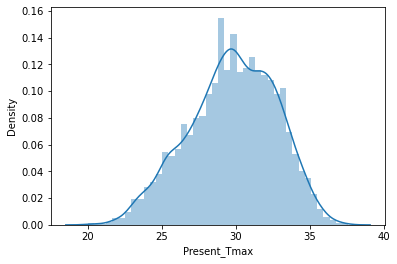

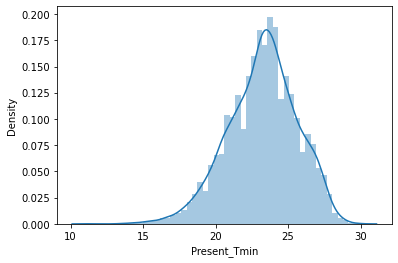

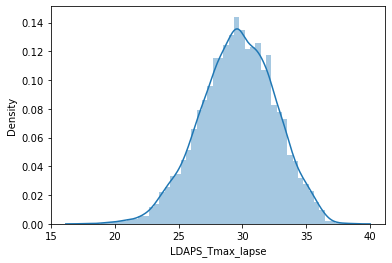

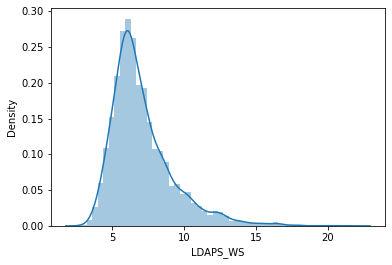

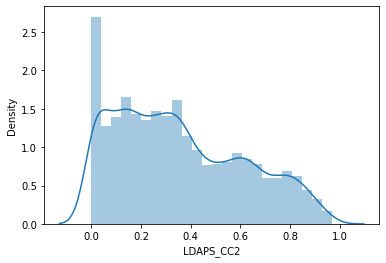

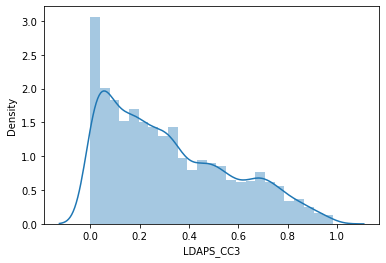

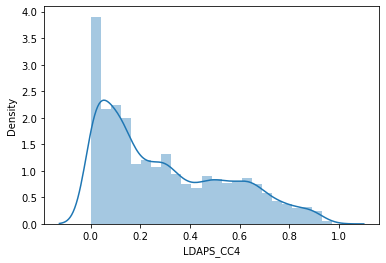

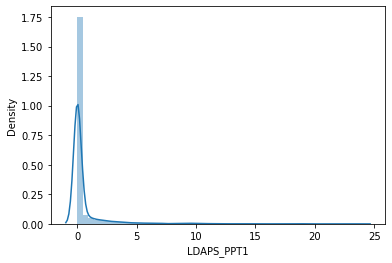

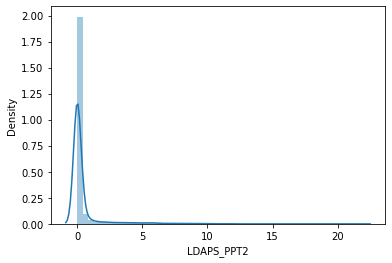

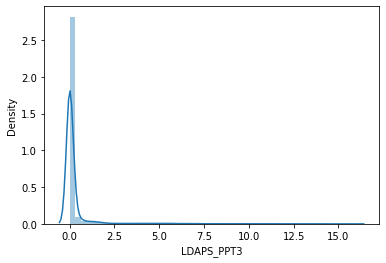

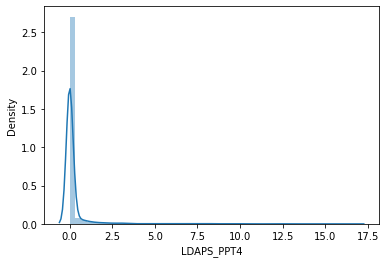

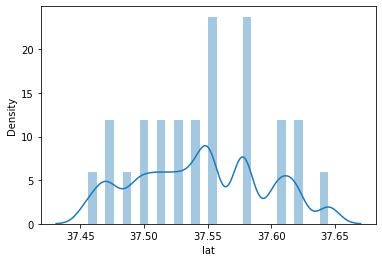

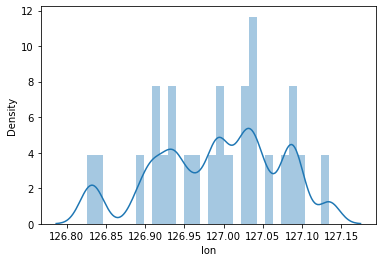

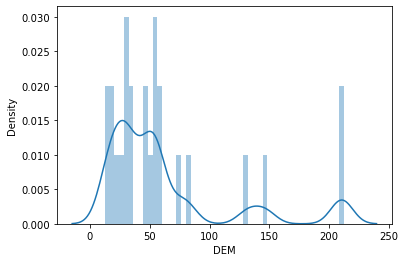

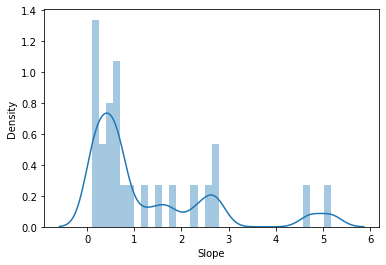

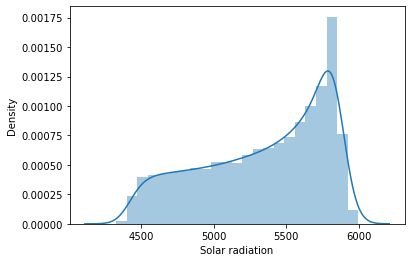

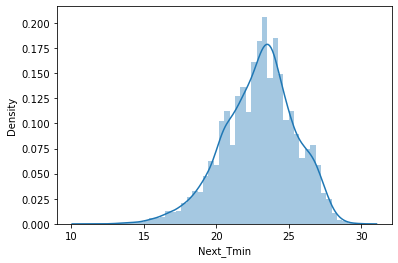

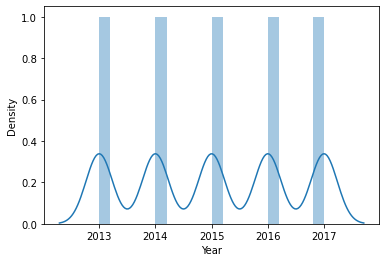

In [19]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

Distributions of columns some are distrinbuted normally some are not distributed normally

In [20]:
df.plot(kind='box',layout=(9,3),figsize=(25,15),subplots=True)
plt.show()

Outliers detecting using boxplot

In [21]:
plt.figure(figsize=(7,7))
plt.xlabel("Present Temperature(max)")
plt.ylabel("Max Temoerature next day")
plt.title("Scatter Plot")
sns.scatterplot(x="Present_Tmax",y="Next_Tmax",data=df)
plt.show()

Present day temperature and next day maximum temperature is equal (aproax.)

In [22]:
plt.figure(figsize=(7,7))
plt.xlabel("Present Temperature(min)")
plt.ylabel("Max Temperature next day")
plt.title("Scatter Plot")
sns.scatterplot(x="Present_Tmin",y="Next_Tmax",data=df)
plt.show()

Minimum temperature of present day also equals to next day maximum temperature

In [23]:
plt.figure(figsize=(7,7))
plt.xlabel("Relative Humidity(min)")
plt.ylabel("Max Temperature next day")
plt.title("Scatter Plot")
sns.scatterplot(x="LDAPS_RHmin",y="Next_Tmax",data=df)
plt.show()

Relative humidity and maximum temperature relatively equal

In [24]:
plt.figure(figsize=(7,7))
plt.xlabel("Relative humidity(max)")
plt.ylabel("Max Temperature next day")
plt.title("Scatter Plot")
sns.scatterplot(x="LDAPS_RHmax",y="Next_Tmax",data=df)
plt.show()

Maximum Relative Humidity and maximum temperature next day

In [25]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Day', 'Month', 'Year'],
      dtype='object')

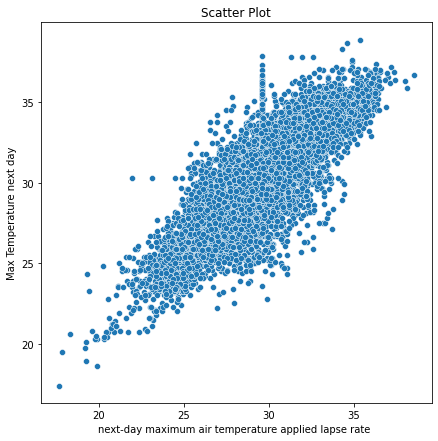

In [26]:
plt.figure(figsize=(7,7))
plt.xlabel("next-day maximum air temperature applied lapse rate ")
plt.ylabel("Max Temperature next day")
plt.title("Scatter Plot")
sns.scatterplot(x="LDAPS_Tmax_lapse",y="Next_Tmax",data=df)
plt.show()

maximum temperature next day and next day maximum air temperature applied lapse rate

In [27]:
plt.figure(figsize=(7,7))
plt.xlabel("next-day minimum air temperature applied lapse rate ")
plt.ylabel("Max Temperature next day")
plt.title("Scatter Plot")
sns.scatterplot(x="LDAPS_Tmin_lapse",y="Next_Tmax",data=df)
plt.show()

maximum temperature next day and next day minimum air temperature applied lapse rate

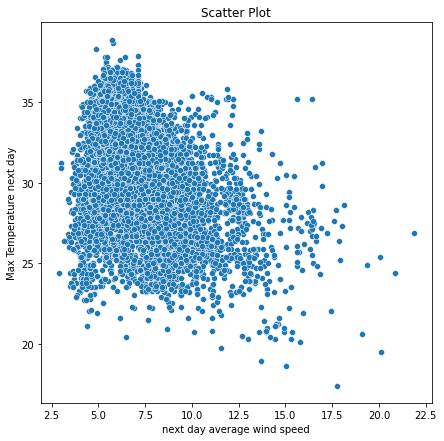

In [28]:
plt.figure(figsize=(7,7))
plt.xlabel("next day average wind speed")
plt.ylabel("Max Temperature next day")
plt.title("Scatter Plot")
sns.scatterplot(x="LDAPS_WS",y="Next_Tmax",data=df)
plt.show()

next day average wind speed and next day maximum temperature

In [29]:
plt.figure(figsize=(7,7))
plt.xlabel("next-day avearge latent heat flux ")
plt.ylabel("Max Temperature next day")
plt.title("Scatter Plot")
sns.scatterplot(x="LDAPS_LH",y="Next_Tmax",data=df)
plt.show()

next day latent heat flux and next day maximum temperature

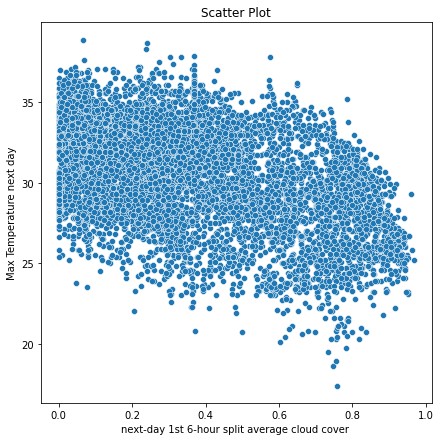

In [30]:
plt.figure(figsize=(7,7))
plt.xlabel("next-day 1st 6-hour split average cloud cover ")
plt.ylabel("Max Temperature next day")
plt.title("Scatter Plot")
sns.scatterplot(x="LDAPS_CC1",y="Next_Tmax",data=df)
plt.show()

Next day average cloud cover of first 6 hour and next day maximum temperature

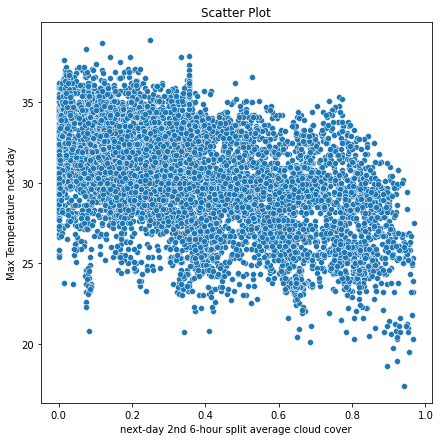

In [31]:
plt.figure(figsize=(7,7))
plt.xlabel("next-day 2nd 6-hour split average cloud cover")
plt.ylabel("Max Temperature next day")
plt.title("Scatter Plot")
sns.scatterplot(x="LDAPS_CC2",y="Next_Tmax",data=df)
plt.show()

next-day 2nd 6-hour split average cloud cover and next day maximum temperature

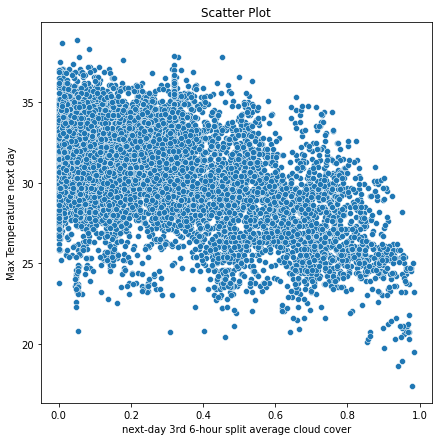

In [32]:
plt.figure(figsize=(7,7))
plt.xlabel("next-day 3rd 6-hour split average cloud cover")
plt.ylabel("Max Temperature next day")
plt.title("Scatter Plot")
sns.scatterplot(x="LDAPS_CC3",y="Next_Tmax",data=df)
plt.show()

next-day 3rd 6-hour split average cloud cover and next day maximum temperature

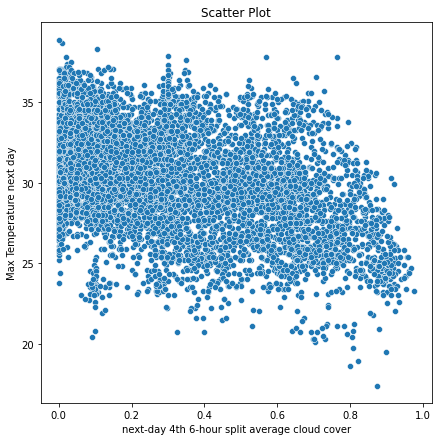

In [33]:
plt.figure(figsize=(7,7))
plt.xlabel("next-day 4th 6-hour split average cloud cover")
plt.ylabel("Max Temperature next day")
plt.title("Scatter Plot")
sns.scatterplot(x="LDAPS_CC4",y="Next_Tmax",data=df)
plt.show()

next-day 4th 6-hour split average cloud cover and next day maximum temperature

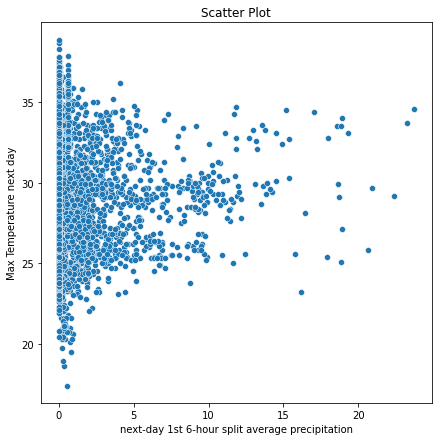

In [34]:
plt.figure(figsize=(7,7))
plt.xlabel("next-day 1st 6-hour split average precipitation")
plt.ylabel("Max Temperature next day")
plt.title("Scatter Plot")
sns.scatterplot(x="LDAPS_PPT1",y="Next_Tmax",data=df)
plt.show()

next-day 1st 6-hour split average precipitation and next day maximum temperature

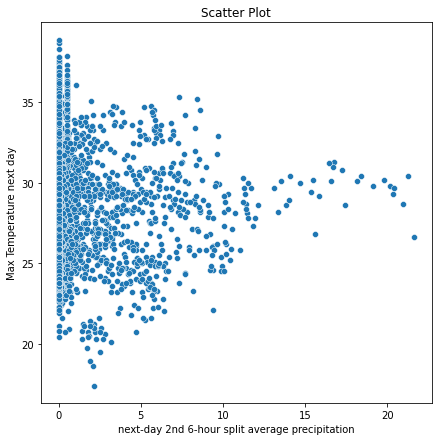

In [35]:
plt.figure(figsize=(7,7))
plt.xlabel("next-day 2nd 6-hour split average precipitation")
plt.ylabel("Max Temperature next day")
plt.title("Scatter Plot")
sns.scatterplot(x="LDAPS_PPT2",y="Next_Tmax",data=df)
plt.show()

next-day 2nd 6-hour split average precipitation and next day maximum temperature

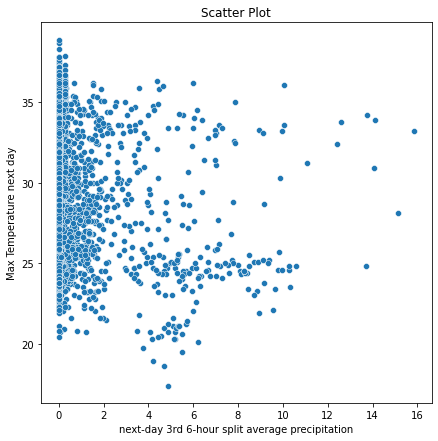

In [36]:
plt.figure(figsize=(7,7))
plt.xlabel("next-day 3rd 6-hour split average precipitation")
plt.ylabel("Max Temperature next day")
plt.title("Scatter Plot")
sns.scatterplot(x="LDAPS_PPT3",y="Next_Tmax",data=df)
plt.show()

next-day 3rd 6-hour split average precipitation and next day maximum temperature

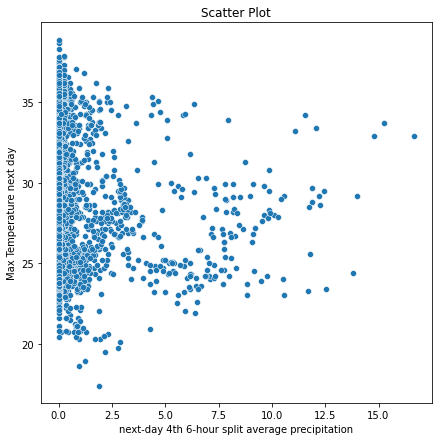

In [37]:
plt.figure(figsize=(7,7))
plt.xlabel("next-day 4th 6-hour split average precipitation")
plt.ylabel("Max Temperature next day")
plt.title("Scatter Plot")
sns.scatterplot(x="LDAPS_PPT4",y="Next_Tmax",data=df)
plt.show()

next-day 4th 6-hour split average precipitation and next day maximum temperature

In [38]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Day', 'Month', 'Year'],
      dtype='object')

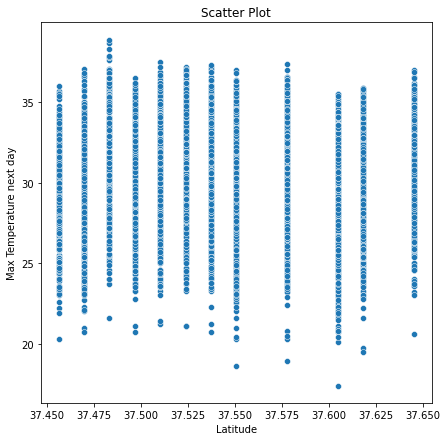

In [39]:
plt.figure(figsize=(7,7))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature next day")
plt.title("Scatter Plot")
sns.scatterplot(x="lat",y="Next_Tmax",data=df)
plt.show()

latitude and  nextday maximum temperature

In [40]:
plt.figure(figsize=(7,7))
plt.xlabel("Longitude")
plt.ylabel("Max Temperature next day")
plt.title("Scatter Plot")
sns.scatterplot(x="lon",y="Next_Tmax",data=df)
plt.show()

longitude and next day maximum temperature

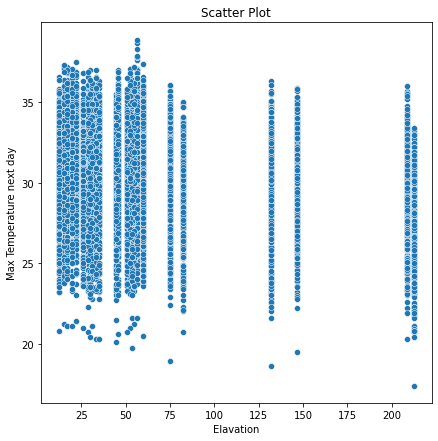

In [41]:
plt.figure(figsize=(7,7))
plt.xlabel("Elavation")
plt.ylabel("Max Temperature next day")
plt.title("Scatter Plot")
sns.scatterplot(x="DEM",y="Next_Tmax",data=df)
plt.show()

Elevation and next day temperature maximum

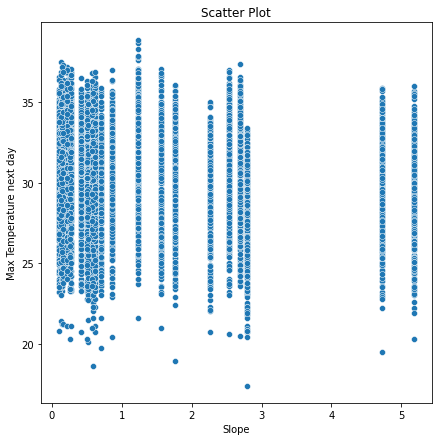

In [42]:
plt.figure(figsize=(7,7))
plt.xlabel("Slope")
plt.ylabel("Max Temperature next day")
plt.title("Scatter Plot")
sns.scatterplot(x="Slope",y="Next_Tmax",data=df)
plt.show()

Slope and next day maximum temperature

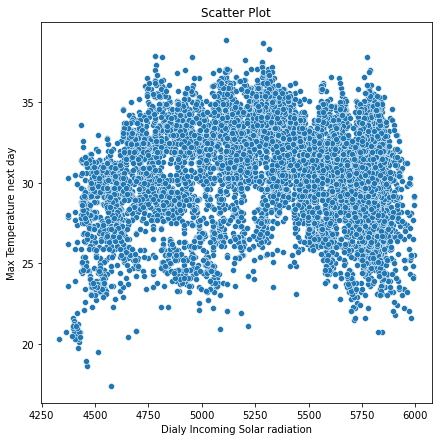

In [43]:
plt.figure(figsize=(7,7))
plt.xlabel("Dialy Incoming Solar radiation")
plt.ylabel("Max Temperature next day")
plt.title("Scatter Plot")
sns.scatterplot(x="Solar radiation",y="Next_Tmax",data=df)
plt.show()

 Solar radiation and next day maximum temperature

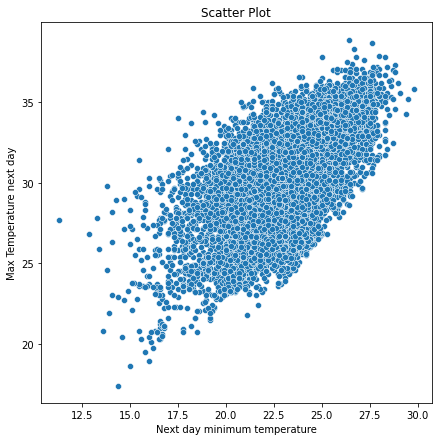

In [44]:
plt.figure(figsize=(7,7))
plt.xlabel("Next day minimum temperature")
plt.ylabel("Max Temperature next day")
plt.title("Scatter Plot")
sns.scatterplot(x="Next_Tmin",y="Next_Tmax",data=df)
plt.show()

Next day minimum and maximum temperature

Now let's check relation between Next day minimum temperature and Other features

In [45]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Day', 'Month', 'Year'],
      dtype='object')

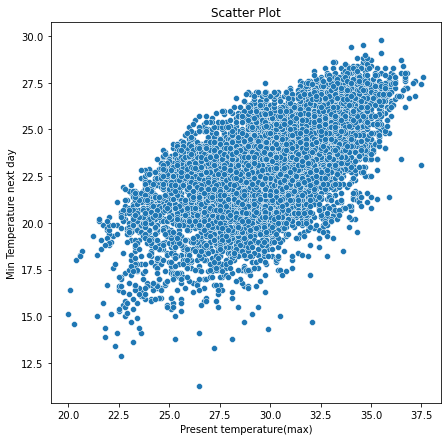

In [46]:
plt.figure(figsize=(7,7))
plt.xlabel("Present temperature(max)")
plt.ylabel("Min Temperature next day")
plt.title("Scatter Plot")
sns.scatterplot(x="Present_Tmax",y="Next_Tmin",data=df)
plt.show()

Present maximum temperature and next day minimum temeprature

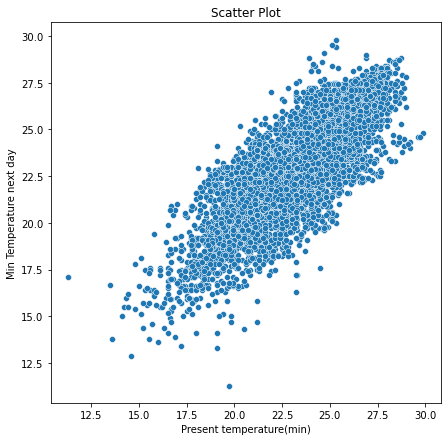

In [47]:
plt.figure(figsize=(7,7))
plt.xlabel("Present temperature(min)")
plt.ylabel("Min Temperature next day")
plt.title("Scatter Plot")
sns.scatterplot(x="Present_Tmin",y="Next_Tmin",data=df)
plt.show()

Present minimum temperature and next day minimum temperature

In [48]:
plt.figure(figsize=(7,7))
plt.xlabel("Relative Humidity(min)")
plt.ylabel("Min Temperature next day")
plt.title("Scatter Plot")
sns.scatterplot(x="LDAPS_RHmin",y="Next_Tmin",data=df)
plt.show()

next day minimum temeperature and minimum relative humidity

In [49]:
plt.figure(figsize=(7,7))
plt.xlabel("Relative humidity(max)")
plt.ylabel("Min Temperature next day")
plt.title("Scatter Plot")
sns.scatterplot(x="LDAPS_RHmax",y="Next_Tmin",data=df)
plt.show()

Next day minimum temperature  and relative humidity minimum

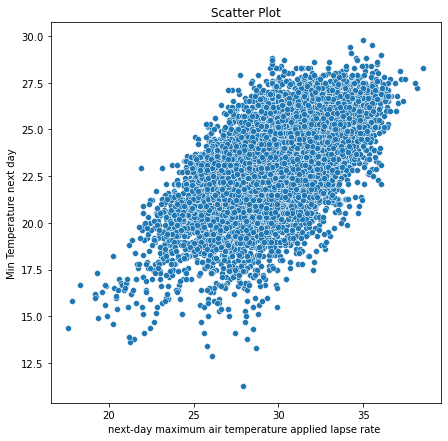

In [50]:
plt.figure(figsize=(7,7))
plt.xlabel("next-day maximum air temperature applied lapse rate ")
plt.ylabel("Min Temperature next day")
plt.title("Scatter Plot")
sns.scatterplot(x="LDAPS_Tmax_lapse",y="Next_Tmin",data=df)
plt.show()

Next day maximum air temperature at lapse and Next day minimum temperature

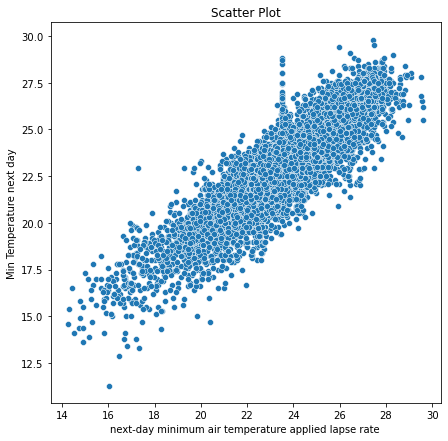

In [51]:
plt.figure(figsize=(7,7))
plt.xlabel("next-day minimum air temperature applied lapse rate ")
plt.ylabel("Min Temperature next day")
plt.title("Scatter Plot")
sns.scatterplot(x="LDAPS_Tmin_lapse",y="Next_Tmin",data=df)
plt.show()

Next day minimum air temperature and nextday  minimum air temperature

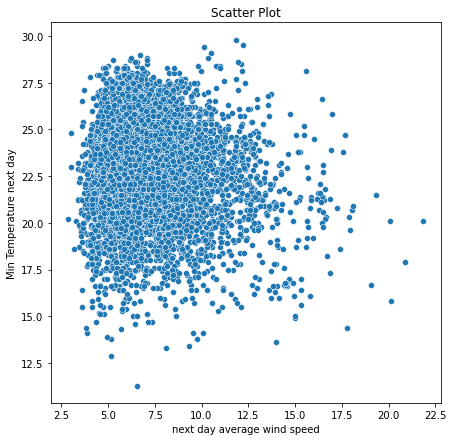

In [52]:
plt.figure(figsize=(7,7))
plt.xlabel("next day average wind speed")
plt.ylabel("Min Temperature next day")
plt.title("Scatter Plot")
sns.scatterplot(x="LDAPS_WS",y="Next_Tmin",data=df)
plt.show()

Relation between next day average wind speed and minimum temperature next day

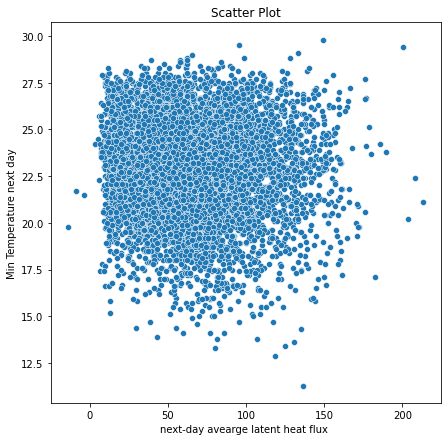

In [53]:
plt.figure(figsize=(7,7))
plt.xlabel("next-day avearge latent heat flux ")
plt.ylabel("Min Temperature next day")
plt.title("Scatter Plot")
sns.scatterplot(x="LDAPS_LH",y="Next_Tmin",data=df)
plt.show()

Nex day average latent heat fluxand next day minimum temperature

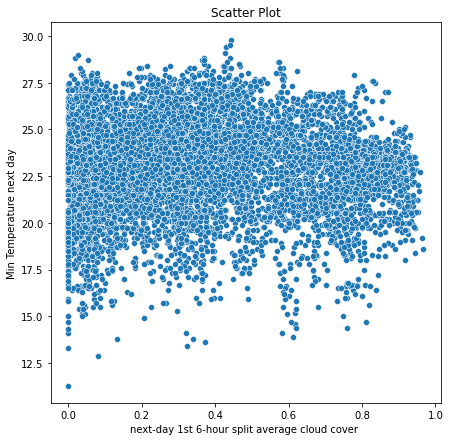

In [54]:
plt.figure(figsize=(7,7))
plt.xlabel("next-day 1st 6-hour split average cloud cover ")
plt.ylabel("Min Temperature next day")
plt.title("Scatter Plot")
sns.scatterplot(x="LDAPS_CC1",y="Next_Tmin",data=df)
plt.show()

Next day 1st 6hour cloud cover and minimum temperature next day

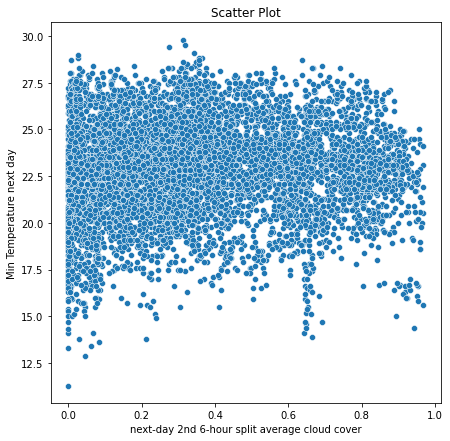

In [55]:
plt.figure(figsize=(7,7))
plt.xlabel("next-day 2nd 6-hour split average cloud cover")
plt.ylabel("Min Temperature next day")
plt.title("Scatter Plot")
sns.scatterplot(x="LDAPS_CC2",y="Next_Tmin",data=df)
plt.show()

Next day 2nd 6 hour average cloud cover and next day minimum temperature

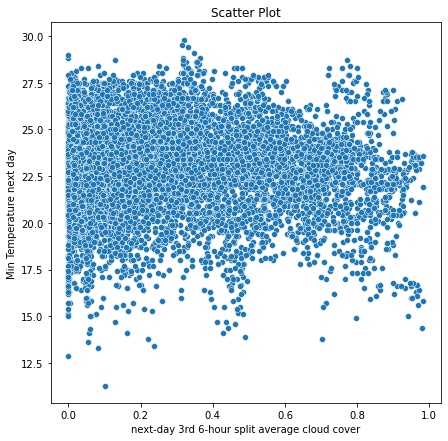

In [56]:
plt.figure(figsize=(7,7))
plt.xlabel("next-day 3rd 6-hour split average cloud cover")
plt.ylabel("Min Temperature next day")
plt.title("Scatter Plot")
sns.scatterplot(x="LDAPS_CC3",y="Next_Tmin",data=df)
plt.show()

Next day 3rd 6 hour average cloud cover and next day minimum temperature

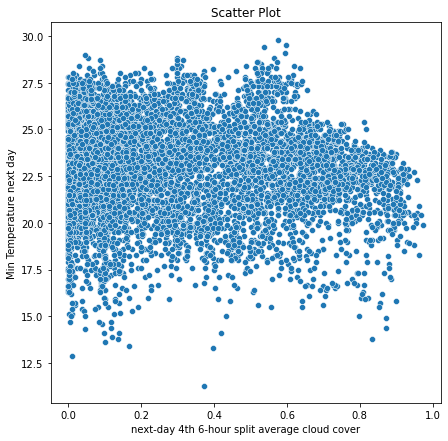

In [57]:
plt.figure(figsize=(7,7))
plt.xlabel("next-day 4th 6-hour split average cloud cover")
plt.ylabel("Min Temperature next day")
plt.title("Scatter Plot")
sns.scatterplot(x="LDAPS_CC4",y="Next_Tmin",data=df)
plt.show()

 Next day 4th 6 hour cloud cover and minimum temperature next day

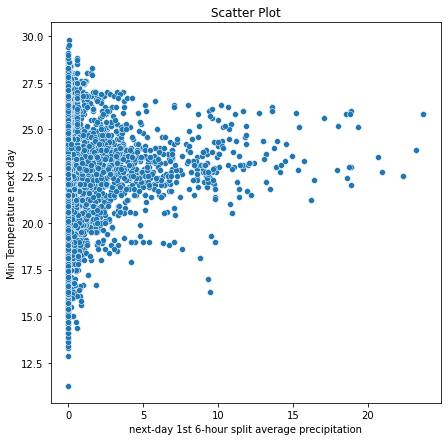

In [58]:
plt.figure(figsize=(7,7))
plt.xlabel("next-day 1st 6-hour split average precipitation")
plt.ylabel("Min Temperature next day")
plt.title("Scatter Plot")
sns.scatterplot(x="LDAPS_PPT1",y="Next_Tmin",data=df)
plt.show()

next day 1st 6 hour average precipitation and minimum temperature next day

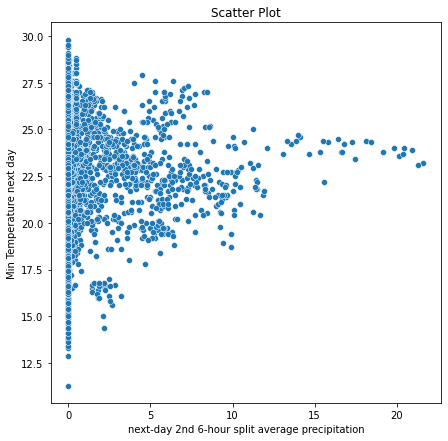

In [59]:
plt.figure(figsize=(7,7))
plt.xlabel("next-day 2nd 6-hour split average precipitation")
plt.ylabel("Min Temperature next day")
plt.title("Scatter Plot")
sns.scatterplot(x="LDAPS_PPT2",y="Next_Tmin",data=df)
plt.show()

Next day 2nd average precipitation and next day minimum temperature

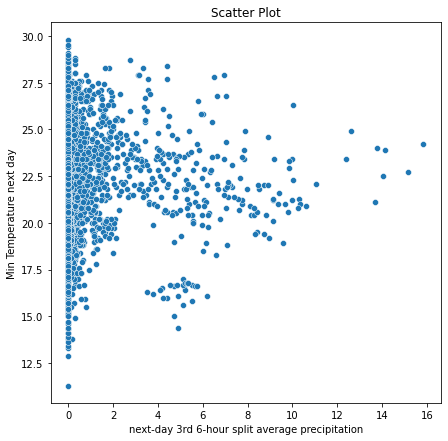

In [60]:
plt.figure(figsize=(7,7))
plt.xlabel("next-day 3rd 6-hour split average precipitation")
plt.ylabel("Min Temperature next day")
plt.title("Scatter Plot")
sns.scatterplot(x="LDAPS_PPT3",y="Next_Tmin",data=df)
plt.show()

Next day 3rd six hour avearge precipitation and next day minimum temperature

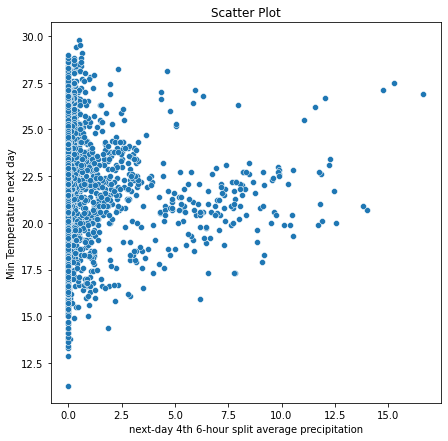

In [61]:
plt.figure(figsize=(7,7))
plt.xlabel("next-day 4th 6-hour split average precipitation")
plt.ylabel("Min Temperature next day")
plt.title("Scatter Plot")
sns.scatterplot(x="LDAPS_PPT4",y="Next_Tmin",data=df)
plt.show()

Next day 4th 6 hour average precipitation and minimum temperature next day

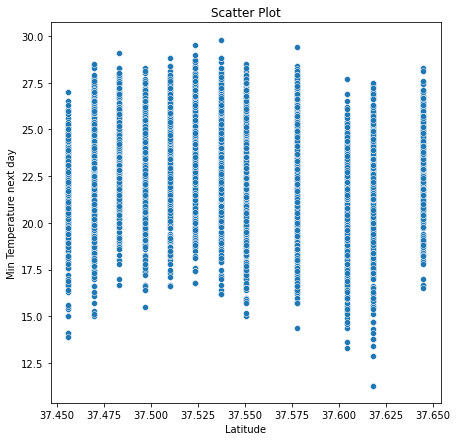

In [62]:
plt.figure(figsize=(7,7))
plt.xlabel("Latitude")
plt.ylabel("Min Temperature next day")
plt.title("Scatter Plot")
sns.scatterplot(x="lat",y="Next_Tmin",data=df)
plt.show()

Latitude and next day minimum temperature

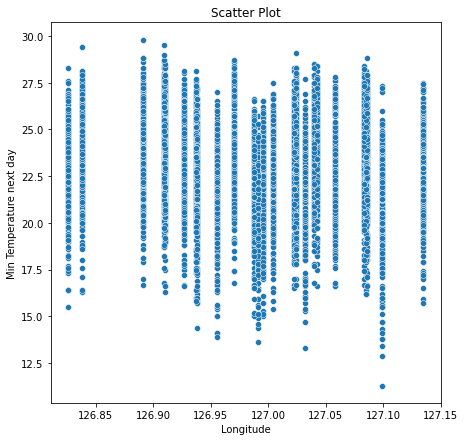

In [63]:
plt.figure(figsize=(7,7))
plt.xlabel("Longitude")
plt.ylabel("Min Temperature next day")
plt.title("Scatter Plot")
sns.scatterplot(x="lon",y="Next_Tmin",data=df)
plt.show()

LOngitude and next day minimum temperature

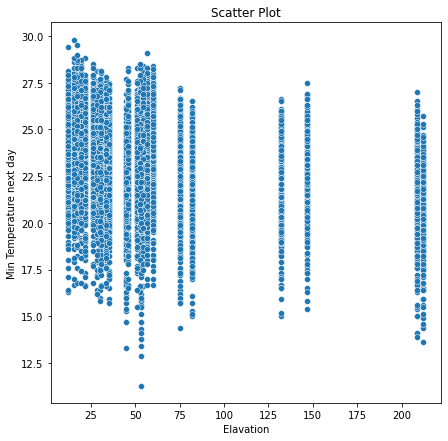

In [64]:
plt.figure(figsize=(7,7))
plt.xlabel("Elavation")
plt.ylabel("Min Temperature next day")
plt.title("Scatter Plot")
sns.scatterplot(x="DEM",y="Next_Tmin",data=df)
plt.show()

Elevation and next day minimum temperature

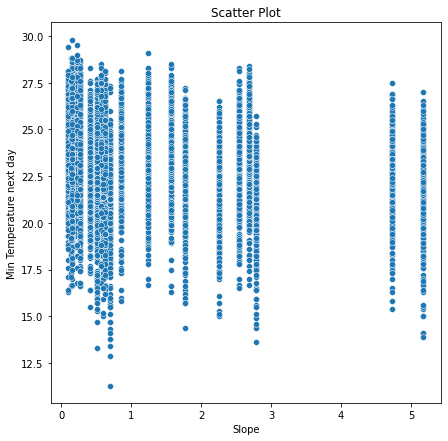

In [65]:
plt.figure(figsize=(7,7))
plt.xlabel("Slope")
plt.ylabel("Min Temperature next day")
plt.title("Scatter Plot")
sns.scatterplot(x="Slope",y="Next_Tmin",data=df)
plt.show()

Slope and minimum temperature next day

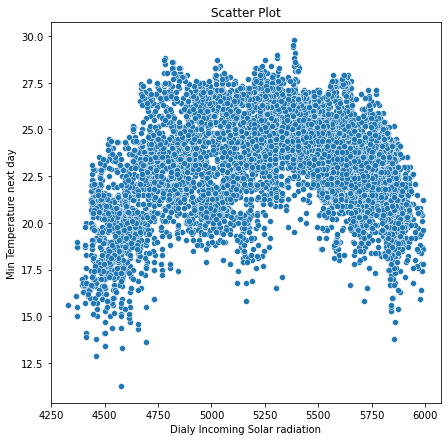

In [66]:
plt.figure(figsize=(7,7))
plt.xlabel("Dialy Incoming Solar radiation")
plt.ylabel("Min Temperature next day")
plt.title("Scatter Plot")
sns.scatterplot(x="Solar radiation",y="Next_Tmin",data=df)
plt.show()

Dialy incoming solar radiation and Minimum temperature next day

In [67]:
plt.figure(figsize=(7,7))
plt.xlabel("Next day maximum temperature")
plt.ylabel("Min Temperature next day")
plt.title("Scatter Plot")
sns.scatterplot(x="Next_Tmax",y="Next_Tmin",data=df)
plt.show()

Next day minimum temperature and next day maximum temperature

# Correlation

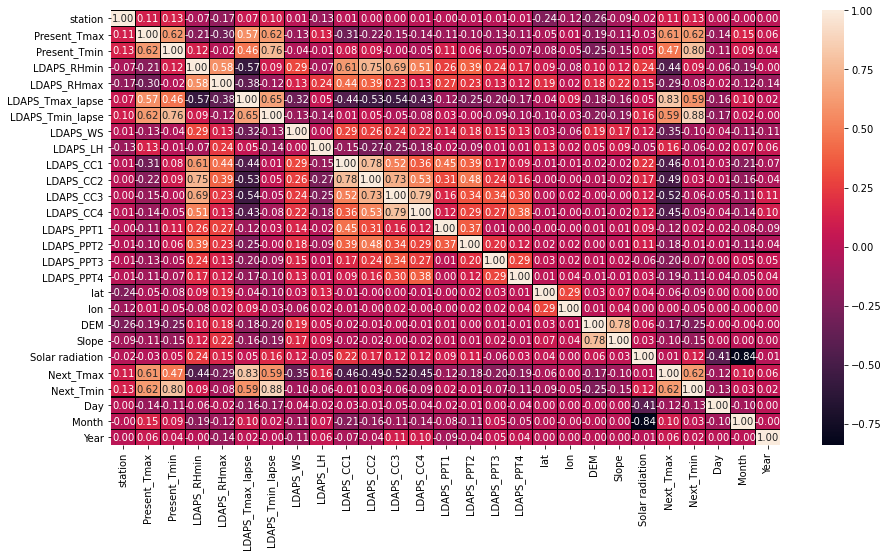

In [68]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")
plt.show()

Next minimum and next maximum temperature are highly correlated,longitude and latitude are not  correlated to next tmaxand next t min.Relative Humidity and cloud cover is correlated to each other.Next temperature maximum is highly correlated to temperature maximum at lapse.

# Outliers removal

In [69]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]

Outliers removed using zscore

In [70]:
print(df.shape)
print(df_new.shape)

(7750, 27)
(6888, 27)


Shape of dataset after removing outliers and before removing outliers

In [71]:
print("Percentage of data loss after removing outliers:",(7750-6888)/7750*100)

Percentage of data loss after removing outliers: 11.122580645161289


11% of data were loss after removing outliers So I proceed with not removing outliers

# Seperating Independent And Dependent Variable

Here let's take 'Next_Tmax' as target varibale

In [72]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Day', 'Month', 'Year'],
      dtype='object')

In [73]:
x = df.loc[:, ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation','Next_Tmin', 'Day', 'Month', 'Year']]
x.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101         23.006936  6.818887   69.451805   0.233947  ...   
1         29.850689         24.035009  5.691890   51.937448   0.225508  ...   
2         30.091292         24.565633  6.138224   20.573050   0.209344  ...   
3         29.704629         23.326177  5.650050   65.727144   0.216372  ...   
4         29.113934         23.486480  5.735004  107.965535   0.151407  ...   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmin  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       21.2   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       22.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       23.9   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       24.3   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       22.5   

   Day  Month  Year  
0   30      6  2013  
1   30      6  2013  
2   30      6  2013  
3   30      6  2013  
4   30      6  2013  

[5 rows x 26 columns]

Seperated

In [74]:
y=df.iloc[:,-5:-4]

Target variable

# Skewness

In [75]:
x.skew()

station             0.000000
Present_Tmax       -0.263013
Present_Tmin       -0.357565
LDAPS_RHmin         0.300229
LDAPS_RHmax        -0.850657
LDAPS_Tmax_lapse   -0.224207
LDAPS_Tmin_lapse   -0.579033
LDAPS_WS            1.556422
LDAPS_LH            0.667582
LDAPS_CC1           0.459193
LDAPS_CC2           0.471965
LDAPS_CC3           0.640088
LDAPS_CC4           0.665829
LDAPS_PPT1          5.324404
LDAPS_PPT2          5.713247
LDAPS_PPT3          6.368693
LDAPS_PPT4          6.743231
lat                 0.086942
lon                -0.285300
DEM                 1.723944
Slope               1.563346
Solar radiation    -0.511006
Next_Tmin          -0.396873
Day                -0.008925
Month              -0.195864
Year                0.000000
dtype: float64

Presence of skewness in some columns

# Skewness Removal

In [76]:
x=power_transform(x,method='yeo-johnson')

Skewness removed using yeo johnson

# Scaling

In [77]:
x=StandardScaler().fit_transform(x)

Features scaled

# Model Building

In [78]:
#linear regression
lr=LinearRegression()
l=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training r2_score is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing r2_score is:- {r2_score(y_test,pred_test)}")
    print("\n")
    if round(r2_score(y_train,pred_train)*100)==round(r2_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        l.append(i)

At random state 0,the training r2_score is:- 0.789426865276598
At random state 0,the testing r2_score is:- 0.8089546893717621


At random state 1,the training r2_score is:- 0.7941860116756692
At random state 1,the testing r2_score is:- 0.7893731351374801


At random state 1 model performs well
At random state 2,the training r2_score is:- 0.7952459937933858
At random state 2,the testing r2_score is:- 0.7855434143603149


At random state 3,the training r2_score is:- 0.7915430954637008
At random state 3,the testing r2_score is:- 0.7995160926724072


At random state 4,the training r2_score is:- 0.7913355378304805
At random state 4,the testing r2_score is:- 0.8005448899289855


At random state 5,the training r2_score is:- 0.793482980994583
At random state 5,the testing r2_score is:- 0.7921824006201518


At random state 5 model performs well
At random state 6,the training r2_score is:- 0.7970218466008565
At random state 6,the testing r2_score is:- 0.7777151555071002


At random state 7,the t

At random state 60,the training r2_score is:- 0.7946998506805495
At random state 60,the testing r2_score is:- 0.7873990747930658


At random state 60 model performs well
At random state 61,the training r2_score is:- 0.7910565530944692
At random state 61,the testing r2_score is:- 0.8013691629406073


At random state 62,the training r2_score is:- 0.7919610885654594
At random state 62,the testing r2_score is:- 0.7983601479199709


At random state 63,the training r2_score is:- 0.793045731563424
At random state 63,the testing r2_score is:- 0.7932650913676618


At random state 63 model performs well
At random state 64,the training r2_score is:- 0.7965585168261059
At random state 64,the testing r2_score is:- 0.7793521180685211


At random state 65,the training r2_score is:- 0.791381577753307
At random state 65,the testing r2_score is:- 0.8001447837594448


At random state 66,the training r2_score is:- 0.7954544073975683
At random state 66,the testing r2_score is:- 0.7851704228095127


At rand

At random state 122,the testing r2_score is:- 0.7958887982762705


At random state 123,the training r2_score is:- 0.7880820893249137
At random state 123,the testing r2_score is:- 0.8132805181091725


At random state 124,the training r2_score is:- 0.7945428984286844
At random state 124,the testing r2_score is:- 0.7881916265866745


At random state 124 model performs well
At random state 125,the training r2_score is:- 0.7953116893049169
At random state 125,the testing r2_score is:- 0.7851218963213857


At random state 126,the training r2_score is:- 0.795090850036321
At random state 126,the testing r2_score is:- 0.78500078834287


At random state 127,the training r2_score is:- 0.7918873027341593
At random state 127,the testing r2_score is:- 0.7991639656666689


At random state 128,the training r2_score is:- 0.7966368455208787
At random state 128,the testing r2_score is:- 0.7800150780852119


At random state 129,the training r2_score is:- 0.7912233404499689
At random state 129,the testing 

At random state 183,the testing r2_score is:- 0.7909682164508969


At random state 183 model performs well
At random state 184,the training r2_score is:- 0.7909279040765033
At random state 184,the testing r2_score is:- 0.8023385090589652


At random state 185,the training r2_score is:- 0.7928858883864642
At random state 185,the testing r2_score is:- 0.7942521197352063


At random state 185 model performs well
At random state 186,the training r2_score is:- 0.8005762845614524
At random state 186,the testing r2_score is:- 0.760025700232206


At random state 187,the training r2_score is:- 0.7951479125486283
At random state 187,the testing r2_score is:- 0.7851896013823961


At random state 188,the training r2_score is:- 0.801569433818193
At random state 188,the testing r2_score is:- 0.7597314616872675


At random state 189,the training r2_score is:- 0.7945111901333872
At random state 189,the testing r2_score is:- 0.7883992855714799


At random state 189 model performs well
At random state 1

Splitted data into train and test data and finding best random state for linear regression

In [79]:
l

[1,
 5,
 7,
 12,
 17,
 18,
 20,
 23,
 25,
 26,
 28,
 29,
 34,
 38,
 39,
 41,
 42,
 46,
 54,
 55,
 57,
 60,
 63,
 70,
 71,
 74,
 76,
 77,
 78,
 80,
 84,
 89,
 92,
 93,
 96,
 98,
 100,
 101,
 103,
 106,
 113,
 117,
 118,
 119,
 120,
 124,
 132,
 134,
 135,
 137,
 139,
 141,
 143,
 144,
 147,
 149,
 151,
 154,
 161,
 166,
 174,
 178,
 181,
 183,
 185,
 189,
 191,
 192,
 195,
 198]

List of best random states

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=198)
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print("r2 score",r2_score(y_test,predlr)*100)
print("Mean Absolute error",mean_absolute_error(y_test,predlr))
print("RMSE",np.sqrt(mean_squared_error(y_test,predlr)))

r2 score 79.18724155549006
Mean Absolute error 1.094304230066392
RMSE 1.4437319207331627


Applied best random state and print r2 score,mse,rmse for linear regression

In [81]:
#kneighbors regression
kn=KNeighborsRegressor()
k=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    kn.fit(x_train,y_train)
    pred_train=kn.predict(x_train)
    pred_test=kn.predict(x_test)
    print(f"At random state {i},the training r2_score is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing r2_score is:- {r2_score(y_test,pred_test)}")
    print("\n")
    if round(r2_score(y_train,pred_train)*100)==round(r2_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        k.append(i)

At random state 0,the training r2_score is:- 0.9273885326905913
At random state 0,the testing r2_score is:- 0.8974757763042157


At random state 1,the training r2_score is:- 0.9267371109234126
At random state 1,the testing r2_score is:- 0.8883298062444014


At random state 2,the training r2_score is:- 0.9289677661964183
At random state 2,the testing r2_score is:- 0.8824451260366329


At random state 3,the training r2_score is:- 0.9267486413340543
At random state 3,the testing r2_score is:- 0.8947493137203893


At random state 4,the training r2_score is:- 0.927330676987211
At random state 4,the testing r2_score is:- 0.8879027720369792


At random state 5,the training r2_score is:- 0.928114379290063
At random state 5,the testing r2_score is:- 0.8929810366882835


At random state 6,the training r2_score is:- 0.9291963039284727
At random state 6,the testing r2_score is:- 0.8832653014609056


At random state 7,the training r2_score is:- 0.9268425766008725
At random state 7,the testing r2_sc

At random state 63,the training r2_score is:- 0.9253617353953658
At random state 63,the testing r2_score is:- 0.8985711806303832


At random state 64,the training r2_score is:- 0.928064075487706
At random state 64,the testing r2_score is:- 0.8787450945213069


At random state 65,the training r2_score is:- 0.9265768229186051
At random state 65,the testing r2_score is:- 0.8912897796561894


At random state 66,the training r2_score is:- 0.9286372569177407
At random state 66,the testing r2_score is:- 0.8854870751093251


At random state 67,the training r2_score is:- 0.9269502707368835
At random state 67,the testing r2_score is:- 0.887545122379829


At random state 68,the training r2_score is:- 0.927848088031089
At random state 68,the testing r2_score is:- 0.8845096958027969


At random state 69,the training r2_score is:- 0.9262814370655117
At random state 69,the testing r2_score is:- 0.8863629550479393


At random state 70,the training r2_score is:- 0.9267128674312521
At random state 70,th

At random state 126,the training r2_score is:- 0.9281686098191458
At random state 126,the testing r2_score is:- 0.8899040486934323


At random state 127,the training r2_score is:- 0.9275867427108959
At random state 127,the testing r2_score is:- 0.8918754611573669


At random state 128,the training r2_score is:- 0.9255596692409699
At random state 128,the testing r2_score is:- 0.8890986448249951


At random state 129,the training r2_score is:- 0.9297456649869115
At random state 129,the testing r2_score is:- 0.8922379974199776


At random state 130,the training r2_score is:- 0.9274280111998201
At random state 130,the testing r2_score is:- 0.8891067076892046


At random state 131,the training r2_score is:- 0.9274709970405628
At random state 131,the testing r2_score is:- 0.8795326357513695


At random state 132,the training r2_score is:- 0.9292325145544732
At random state 132,the testing r2_score is:- 0.8892654526275943


At random state 133,the training r2_score is:- 0.9278251971600349
At 

At random state 188,the training r2_score is:- 0.9275033029724246
At random state 188,the testing r2_score is:- 0.8871526580153037


At random state 189,the training r2_score is:- 0.9284271862070725
At random state 189,the testing r2_score is:- 0.8823183109148434


At random state 190,the training r2_score is:- 0.9275834698247418
At random state 190,the testing r2_score is:- 0.8882475596104693


At random state 191,the training r2_score is:- 0.9292701041865754
At random state 191,the testing r2_score is:- 0.8887408968824532


At random state 192,the training r2_score is:- 0.9269802106263084
At random state 192,the testing r2_score is:- 0.8927764945605283


At random state 193,the training r2_score is:- 0.9262592774433043
At random state 193,the testing r2_score is:- 0.8986381976650564


At random state 194,the training r2_score is:- 0.9285098535270825
At random state 194,the testing r2_score is:- 0.8821042129675962


At random state 195,the training r2_score is:- 0.9286056160141491
At 

Splitted data into trained and test data and finding best random states for knn regressor

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=145)
kn.fit(x_train,y_train)
predkn=kn.predict(x_test)
print("r2 score",r2_score(y_test,predkn)*100)
print("Mean Absolute error",mean_absolute_error(y_test,predkn))
print("RMSE",np.sqrt(mean_squared_error(y_test,predkn)))

r2 score 90.00156763916793
Mean Absolute error 0.7575226391063786
RMSE 1.0079884356919722


Appling best random state and printing r2 score,mse and rmse for knn regressor

In [83]:
#dt regression
dt=DecisionTreeRegressor()
d=[]
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    dt.fit(x_train,y_train)
    pred_train=dt.predict(x_train)
    pred_test=dt.predict(x_test)
    print(f"At random state {i},the training r2_score is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing r2_score is:- {r2_score(y_test,pred_test)}")
    print("\n")
    if round(r2_score(y_train,pred_train)*100)==round(r2_score(y_test,pred_test)*100):
        print("At random state",i,"model performs well")
        d.append(i)

At random state 0,the training r2_score is:- 1.0
At random state 0,the testing r2_score is:- 0.8031543390094432


At random state 1,the training r2_score is:- 1.0
At random state 1,the testing r2_score is:- 0.7731200985847317


At random state 2,the training r2_score is:- 1.0
At random state 2,the testing r2_score is:- 0.7728545588817195


At random state 3,the training r2_score is:- 1.0
At random state 3,the testing r2_score is:- 0.8118147594648668


At random state 4,the training r2_score is:- 1.0
At random state 4,the testing r2_score is:- 0.8177857104864772


At random state 5,the training r2_score is:- 1.0
At random state 5,the testing r2_score is:- 0.8109296483824883


At random state 6,the training r2_score is:- 1.0
At random state 6,the testing r2_score is:- 0.7804995755119918


At random state 7,the training r2_score is:- 1.0
At random state 7,the testing r2_score is:- 0.8158100273222654


At random state 8,the training r2_score is:- 1.0
At random state 8,the testing r2_score 

At random state 72,the training r2_score is:- 1.0
At random state 72,the testing r2_score is:- 0.7879958495788628


At random state 73,the training r2_score is:- 1.0
At random state 73,the testing r2_score is:- 0.79671861877384


At random state 74,the training r2_score is:- 1.0
At random state 74,the testing r2_score is:- 0.7812942083194251


At random state 75,the training r2_score is:- 1.0
At random state 75,the testing r2_score is:- 0.7829342295869686


At random state 76,the training r2_score is:- 1.0
At random state 76,the testing r2_score is:- 0.8155115066697829


At random state 77,the training r2_score is:- 1.0
At random state 77,the testing r2_score is:- 0.8026284454815645


At random state 78,the training r2_score is:- 1.0
At random state 78,the testing r2_score is:- 0.803641877882153


At random state 79,the training r2_score is:- 1.0
At random state 79,the testing r2_score is:- 0.7805724205716975


At random state 80,the training r2_score is:- 1.0
At random state 80,the te

At random state 142,the testing r2_score is:- 0.7955899733786933


At random state 143,the training r2_score is:- 1.0
At random state 143,the testing r2_score is:- 0.7911324684567004


At random state 144,the training r2_score is:- 1.0
At random state 144,the testing r2_score is:- 0.7730641855717154


At random state 145,the training r2_score is:- 1.0
At random state 145,the testing r2_score is:- 0.8274638572929569


At random state 146,the training r2_score is:- 1.0
At random state 146,the testing r2_score is:- 0.8219593923725117


At random state 147,the training r2_score is:- 1.0
At random state 147,the testing r2_score is:- 0.7973154304885124


At random state 148,the training r2_score is:- 1.0
At random state 148,the testing r2_score is:- 0.8063138580884516


At random state 149,the training r2_score is:- 1.0
At random state 149,the testing r2_score is:- 0.8138411262546141


At random state 150,the training r2_score is:- 1.0
At random state 150,the testing r2_score is:- 0.82257792

Splitted model into trained and test and finding best random states for decision tree regressor

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=199)
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print("r2 score",r2_score(y_test,preddt)*100)
print("Mean Absolute error",mean_absolute_error(y_test,preddt))
print("RMSE",np.sqrt(mean_squared_error(y_test,preddt)))

r2 score 82.46239948311118
Mean Absolute error 0.9659033719594947
RMSE 1.3335032081059892


Applied Best random state and print r2 score,mse,rmse for decision tree regressor

Splitted model into trained and test data and finding best random state for random forest regressor

In [85]:
#rf regression
rf=RandomForestRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=184)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("r2 score",r2_score(y_test,predrf)*100)
print("Mean Absolute error",mean_absolute_error(y_test,predrf))
print("RMSE",np.sqrt(mean_squared_error(y_test,predrf)))

r2 score 92.00597120669606
Mean Absolute error 0.6819653650694225
RMSE 0.9055118240912264


Applied best random state and print r2 score,mse,rmse for random forest regressor

# Cross Validation Score

In [86]:
print("CV score and it's mean of KNearest Neighbors:",cross_val_score(kn,x,y,cv=10).mean(),"r2 score:",r2_score(y_test,predkn))
print("CV score and it's mean of Decision Tree Regressor:",cross_val_score(dt,x,y,cv=10).mean(),"r2 score:",r2_score(y_test,preddt))
print("CV score and it's mean of Linear Regression:",cross_val_score(lr,x,y,cv=10).mean(),"r2 score:",r2_score(y_test,predlr))
print("CV score and it's mean of Random Forest:",cross_val_score(rf,x,y,cv=10).mean(),"r2 score:",r2_score(y_test,predrf))

CV score and it's mean of KNearest Neighbors: 0.48155550059465246 r2 score: -0.8565508921140619
CV score and it's mean of Decision Tree Regressor: 0.31064227164479136 r2 score: -1.0278006690541535
CV score and it's mean of Linear Regression: 0.6676764116579674 r2 score: -0.8156692370231389
CV score and it's mean of Random Forest: 0.6502900349173494 r2 score: 0.9200597120669606


CV score and r2 score of Random forest regeressor is least difference so I prefer Random forest as my final model

# Hyper Parameter Tuning

In [87]:
param={'min_samples_split':np.arange(0,10),'n_estimators':np.arange(10,26),'criterion':['squared_error','absolute_error','poisson'],
          'max_depth':np.arange(0,14)}

Parameters Stored for random forest regressor

In [88]:
grid_max=GridSearchCV(rf,param,cv=10)

Called gidsearch Cv parameters at cv score=8

In [89]:
#grid_max.fit(x_train,y_train)

Fitting data

In [90]:
#grid_max.best_params_

Best parameters after tuning

In [95]:
best_max=RandomForestRegressor(criterion='poisson',max_depth=25,n_estimators=120,min_samples_split=7)
best_max.fit(x_train,y_train)
predbest=best_max.predict(x_test)
acc_b=(r2_score(y_test,predbest))
print(acc_b*100)

13.068259982546682


Model after applying bestparameters

# Saving Model

In [97]:
import joblib as jb
jb.dump(best_max,"Best_Max_Temp.pkl")

['Best_Max_Temp.pkl']

Model saved

Now we can take 'Next_Tmin' as our target variable

In [98]:
a = df.loc[:, ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation','Next_Tmax', 'Day', 'Month', 'Year']]
a.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101         23.006936  6.818887   69.451805   0.233947  ...   
1         29.850689         24.035009  5.691890   51.937448   0.225508  ...   
2         30.091292         24.565633  6.138224   20.573050   0.209344  ...   
3         29.704629         23.326177  5.650050   65.727144   0.216372  ...   
4         29.113934         23.486480  5.735004  107.965535   0.151407  ...   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Day  Month  Year  
0   30      6  2013  
1   30      6  2013  
2   30      6  2013  
3   30      6  2013  
4   30      6  2013  

[5 rows x 26 columns]

Seperated features

In [99]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Day', 'Month', 'Year'],
      dtype='object')

In [100]:
b=df.iloc[:,-4:-3]
b.head()

Next_Tmin
0       21.2
1       22.5
2       23.9
3       24.3
4       22.5

Target varibale

# Skewness

In [101]:
a.skew()

station             0.000000
Present_Tmax       -0.263013
Present_Tmin       -0.357565
LDAPS_RHmin         0.300229
LDAPS_RHmax        -0.850657
LDAPS_Tmax_lapse   -0.224207
LDAPS_Tmin_lapse   -0.579033
LDAPS_WS            1.556422
LDAPS_LH            0.667582
LDAPS_CC1           0.459193
LDAPS_CC2           0.471965
LDAPS_CC3           0.640088
LDAPS_CC4           0.665829
LDAPS_PPT1          5.324404
LDAPS_PPT2          5.713247
LDAPS_PPT3          6.368693
LDAPS_PPT4          6.743231
lat                 0.086942
lon                -0.285300
DEM                 1.723944
Slope               1.563346
Solar radiation    -0.511006
Next_Tmax          -0.335956
Day                -0.008925
Month              -0.195864
Year                0.000000
dtype: float64

Presence of skewness

# Removal of skewness

In [102]:
a=power_transform(a,method='yeo-johnson')

Skewness removed

# Scaling

In [103]:
a=StandardScaler().fit_transform(a)

Features scaled

# Model Building

In [104]:
#linear regression
ln=LinearRegression()
l=[]
for i in range(0,200):
    a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.2,random_state=i)
    ln.fit(a_train,b_train)
    pred_train=ln.predict(a_train)
    pred_test=ln.predict(a_test)
    print(f"At random state {i},the training r2_score is:- {r2_score(b_train,pred_train)}")
    print(f"At random state {i},the testing r2_score is:- {r2_score(b_test,pred_test)}")
    print("\n")
    if round(r2_score(b_train,pred_train)*100)==round(r2_score(b_test,pred_test)*100):
        print("At random state",i,"model performs well")
        l.append(i)

At random state 0,the training r2_score is:- 0.8454764473533387
At random state 0,the testing r2_score is:- 0.8497081643866332


At random state 0 model performs well
At random state 1,the training r2_score is:- 0.8487737151786112
At random state 1,the testing r2_score is:- 0.8368176364064666


At random state 2,the training r2_score is:- 0.8476890943231492
At random state 2,the testing r2_score is:- 0.8413258417803984


At random state 3,the training r2_score is:- 0.8422594413800084
At random state 3,the testing r2_score is:- 0.8619231708136735


At random state 4,the training r2_score is:- 0.8452689996165031
At random state 4,the testing r2_score is:- 0.8508296140073774


At random state 4 model performs well
At random state 5,the training r2_score is:- 0.8450302265784828
At random state 5,the testing r2_score is:- 0.8520058720064092


At random state 5 model performs well
At random state 6,the training r2_score is:- 0.8482076970198249
At random state 6,the testing r2_score is:- 0.83

At random state 65,the testing r2_score is:- 0.8497442254679399


At random state 65 model performs well
At random state 66,the training r2_score is:- 0.8454183937279587
At random state 66,the testing r2_score is:- 0.8508541358171136


At random state 66 model performs well
At random state 67,the training r2_score is:- 0.8470054799538068
At random state 67,the testing r2_score is:- 0.8441564466625309


At random state 68,the training r2_score is:- 0.8449147832137354
At random state 68,the testing r2_score is:- 0.8520770013485499


At random state 69,the training r2_score is:- 0.8452049315755334
At random state 69,the testing r2_score is:- 0.8511967908288378


At random state 69 model performs well
At random state 70,the training r2_score is:- 0.8463877092109134
At random state 70,the testing r2_score is:- 0.8467284988244634


At random state 70 model performs well
At random state 71,the training r2_score is:- 0.8475426154253854
At random state 71,the testing r2_score is:- 0.84231878636

At random state 125,the testing r2_score is:- 0.8348490592620053


At random state 126,the training r2_score is:- 0.8460070981857581
At random state 126,the testing r2_score is:- 0.8479094587917639


At random state 126 model performs well
At random state 127,the training r2_score is:- 0.8456181968709109
At random state 127,the testing r2_score is:- 0.8496449094307437


At random state 127 model performs well
At random state 128,the training r2_score is:- 0.8484878128076675
At random state 128,the testing r2_score is:- 0.8380996563794424


At random state 129,the training r2_score is:- 0.8444223472549851
At random state 129,the testing r2_score is:- 0.85355269422616


At random state 130,the training r2_score is:- 0.8470460487796214
At random state 130,the testing r2_score is:- 0.8443763173044732


At random state 131,the training r2_score is:- 0.844679870779072
At random state 131,the testing r2_score is:- 0.8537610004043733


At random state 132,the training r2_score is:- 0.845417756

At random state 182,the training r2_score is:- 0.8496424614319206
At random state 182,the testing r2_score is:- 0.8330165151819077


At random state 183,the training r2_score is:- 0.8448817168218161
At random state 183,the testing r2_score is:- 0.8525739878885852


At random state 184,the training r2_score is:- 0.8466410155153805
At random state 184,the testing r2_score is:- 0.8455147787477888


At random state 184 model performs well
At random state 185,the training r2_score is:- 0.8437460849388201
At random state 185,the testing r2_score is:- 0.8568332444092595


At random state 186,the training r2_score is:- 0.8475324299207334
At random state 186,the testing r2_score is:- 0.8417106139389492


At random state 187,the training r2_score is:- 0.8480134452587981
At random state 187,the testing r2_score is:- 0.8399707254786363


At random state 188,the training r2_score is:- 0.8470056609407911
At random state 188,the testing r2_score is:- 0.8436558964078721


At random state 189,the train

Splitted model into trained and test data and finding best random states for linear regression 

In [105]:
l

[0,
 4,
 5,
 21,
 22,
 23,
 25,
 27,
 30,
 39,
 43,
 44,
 45,
 47,
 50,
 51,
 52,
 61,
 63,
 65,
 66,
 69,
 70,
 72,
 75,
 76,
 80,
 82,
 83,
 85,
 89,
 96,
 98,
 101,
 103,
 104,
 108,
 111,
 113,
 115,
 116,
 118,
 119,
 126,
 127,
 132,
 135,
 137,
 138,
 141,
 147,
 149,
 150,
 154,
 155,
 156,
 157,
 158,
 160,
 161,
 163,
 165,
 166,
 170,
 176,
 177,
 184,
 190,
 191,
 194,
 198]

List of best random states

In [106]:
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.2,random_state=198)
ln.fit(a_train,b_train)
predln=ln.predict(a_test)
print("r2 score",r2_score(b_test,predln)*100)
print("Mean Absolute error",mean_absolute_error(b_test,predln))
print("RMSE",np.sqrt(mean_squared_error(b_test,predln)))

r2 score 84.55947576615105
Mean Absolute error 0.7690726948795703
RMSE 0.9860897403416945


Applied best random states and print r2 score,mse and rmse

In [107]:
#Decisontree regressor
dc=DecisionTreeRegressor()
d=[]
for i in range(0,200):
    a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.2,random_state=i)
    dc.fit(a_train,b_train)
    pred_train=dc.predict(a_train)
    pred_test=dc.predict(a_test)
    print(f"At random state {i},the training r2_score is:- {r2_score(b_train,pred_train)}")
    print(f"At random state {i},the testing r2_score is:- {r2_score(b_test,pred_test)}")
    print("\n")
    if round(r2_score(b_train,pred_train)*100)==round(r2_score(b_test,pred_test)*100):
        print("At random state",i,"model performs well")
        d.append(i)

At random state 0,the training r2_score is:- 1.0
At random state 0,the testing r2_score is:- 0.7994592085682877


At random state 1,the training r2_score is:- 1.0
At random state 1,the testing r2_score is:- 0.7773172633417225


At random state 2,the training r2_score is:- 1.0
At random state 2,the testing r2_score is:- 0.8058975276788951


At random state 3,the training r2_score is:- 1.0
At random state 3,the testing r2_score is:- 0.8282889346259872


At random state 4,the training r2_score is:- 1.0
At random state 4,the testing r2_score is:- 0.8156644756640768


At random state 5,the training r2_score is:- 1.0
At random state 5,the testing r2_score is:- 0.7994748724669344


At random state 6,the training r2_score is:- 1.0
At random state 6,the testing r2_score is:- 0.7968993685763754


At random state 7,the training r2_score is:- 1.0
At random state 7,the testing r2_score is:- 0.7906749288862079


At random state 8,the training r2_score is:- 1.0
At random state 8,the testing r2_score 

At random state 71,the testing r2_score is:- 0.7990442177746288


At random state 72,the training r2_score is:- 1.0
At random state 72,the testing r2_score is:- 0.8154290059156569


At random state 73,the training r2_score is:- 1.0
At random state 73,the testing r2_score is:- 0.8126072102164981


At random state 74,the training r2_score is:- 1.0
At random state 74,the testing r2_score is:- 0.7767672887438369


At random state 75,the training r2_score is:- 1.0
At random state 75,the testing r2_score is:- 0.8084428307488787


At random state 76,the training r2_score is:- 1.0
At random state 76,the testing r2_score is:- 0.8049142645933993


At random state 77,the training r2_score is:- 1.0
At random state 77,the testing r2_score is:- 0.7973363540758488


At random state 78,the training r2_score is:- 1.0
At random state 78,the testing r2_score is:- 0.7907457748138993


At random state 79,the training r2_score is:- 1.0
At random state 79,the testing r2_score is:- 0.8021476603228558


At ran

At random state 143,the training r2_score is:- 1.0
At random state 143,the testing r2_score is:- 0.8142247921567978


At random state 144,the training r2_score is:- 1.0
At random state 144,the testing r2_score is:- 0.7887089663662754


At random state 145,the training r2_score is:- 1.0
At random state 145,the testing r2_score is:- 0.8009300091504736


At random state 146,the training r2_score is:- 1.0
At random state 146,the testing r2_score is:- 0.7909249060442342


At random state 147,the training r2_score is:- 1.0
At random state 147,the testing r2_score is:- 0.8017901707391125


At random state 148,the training r2_score is:- 1.0
At random state 148,the testing r2_score is:- 0.8032868766148471


At random state 149,the training r2_score is:- 1.0
At random state 149,the testing r2_score is:- 0.8142795239717739


At random state 150,the training r2_score is:- 1.0
At random state 150,the testing r2_score is:- 0.8025690644668529


At random state 151,the training r2_score is:- 1.0
At ra

Splitted model into train and test model and finding best random states

In [108]:
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.2,random_state=198)
dc.fit(a_train,b_train)
preddc=dc.predict(a_test)
print("r2 score",r2_score(b_test,preddc)*100)
print("Mean Absolute error",mean_absolute_error(b_test,preddc))
print("RMSE",np.sqrt(mean_squared_error(b_test,preddc)))

r2 score 78.97678001350049
Mean Absolute error 0.8332530577304521
RMSE 1.1506282617753958


Applied best random state and print r2 score,mse and rmse of decision tree

In [109]:
#Kneighbors regressor
knn=KNeighborsRegressor()
k=[]
for i in range(0,200):
    a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.2,random_state=i)
    knn.fit(a_train,b_train)
    pred_train=knn.predict(a_train)
    pred_test=knn.predict(a_test)
    print(f"At random state {i},the training r2_score is:- {r2_score(b_train,pred_train)}")
    print(f"At random state {i},the testing r2_score is:- {r2_score(b_test,pred_test)}")
    print("\n")
    if round(r2_score(b_train,pred_train)*100)==round(r2_score(b_test,pred_test)*100):
        print("At random state",i,"model performs well")
        k.append(i)

At random state 0,the training r2_score is:- 0.9253372520595622
At random state 0,the testing r2_score is:- 0.8815153296129774


At random state 1,the training r2_score is:- 0.9249030915322222
At random state 1,the testing r2_score is:- 0.8808835438048616


At random state 2,the training r2_score is:- 0.9255725535385746
At random state 2,the testing r2_score is:- 0.8830304661464327


At random state 3,the training r2_score is:- 0.9238480630796984
At random state 3,the testing r2_score is:- 0.8917984880325779


At random state 4,the training r2_score is:- 0.9249428252184557
At random state 4,the testing r2_score is:- 0.8868253742938584


At random state 5,the training r2_score is:- 0.9251309459627778
At random state 5,the testing r2_score is:- 0.8809133820633431


At random state 6,the training r2_score is:- 0.9266505920832918
At random state 6,the testing r2_score is:- 0.8736804600114845


At random state 7,the training r2_score is:- 0.9234568696010106
At random state 7,the testing r2_

At random state 63,the training r2_score is:- 0.9258821788467357
At random state 63,the testing r2_score is:- 0.8840864797108643


At random state 64,the training r2_score is:- 0.9282626407137848
At random state 64,the testing r2_score is:- 0.8732162548516027


At random state 65,the training r2_score is:- 0.9244181720584186
At random state 65,the testing r2_score is:- 0.8890047448276902


At random state 66,the training r2_score is:- 0.9237259867599793
At random state 66,the testing r2_score is:- 0.8874418248054702


At random state 67,the training r2_score is:- 0.9247959290300164
At random state 67,the testing r2_score is:- 0.888425386016462


At random state 68,the training r2_score is:- 0.9235742925847736
At random state 68,the testing r2_score is:- 0.8889819254550603


At random state 69,the training r2_score is:- 0.923139702366636
At random state 69,the testing r2_score is:- 0.8986693822655645


At random state 70,the training r2_score is:- 0.9243752247782089
At random state 70,t

At random state 126,the training r2_score is:- 0.9222579034868384
At random state 126,the testing r2_score is:- 0.8916560806195717


At random state 127,the training r2_score is:- 0.9247153008693808
At random state 127,the testing r2_score is:- 0.8876699743378557


At random state 128,the training r2_score is:- 0.9230782282620048
At random state 128,the testing r2_score is:- 0.8906425930306501


At random state 129,the training r2_score is:- 0.9222924041706608
At random state 129,the testing r2_score is:- 0.8874121917164614


At random state 130,the training r2_score is:- 0.9256397839134054
At random state 130,the testing r2_score is:- 0.8797122020209884


At random state 131,the training r2_score is:- 0.924197423389452
At random state 131,the testing r2_score is:- 0.887258722616607


At random state 132,the training r2_score is:- 0.925651200786367
At random state 132,the testing r2_score is:- 0.8810124271638672


At random state 133,the training r2_score is:- 0.9244630153898528
At ran

At random state 188,the training r2_score is:- 0.923340293296434
At random state 188,the testing r2_score is:- 0.8919452416974306


At random state 189,the training r2_score is:- 0.9223032473579945
At random state 189,the testing r2_score is:- 0.8942834881737345


At random state 190,the training r2_score is:- 0.925322156717544
At random state 190,the testing r2_score is:- 0.8852119785476111


At random state 191,the training r2_score is:- 0.9266896288139345
At random state 191,the testing r2_score is:- 0.882885886892317


At random state 192,the training r2_score is:- 0.9248086479467148
At random state 192,the testing r2_score is:- 0.8785134035273792


At random state 193,the training r2_score is:- 0.9246342240801904
At random state 193,the testing r2_score is:- 0.8876537418619624


At random state 194,the training r2_score is:- 0.9251128097380712
At random state 194,the testing r2_score is:- 0.8860045077356797


At random state 195,the training r2_score is:- 0.9252384919723846
At ran

Splitted model into trained and test model and finding best random states for kneighbors regressor

In [110]:
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.2,random_state=199)
knn.fit(a_train,b_train)
predknn=knn.predict(a_test)
print("r2 score",r2_score(b_test,predknn)*100)
print("Mean Absolute error",mean_absolute_error(b_test,predknn))
print("RMSE",np.sqrt(mean_squared_error(b_test,predknn)))

r2 score 89.72803562138901
Mean Absolute error 0.6133815070466645
RMSE 0.8022805511685185


Applied best random state and print r2score,mse and rmse

In [111]:
#randomforestregressor
rfr=RandomForestRegressor()
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.2,random_state=199)
rfr.fit(a_train,b_train)
predrfr=rfr.predict(a_test)
print("r2 score",r2_score(b_test,predrfr))
print("Mean Absolute error",mean_absolute_error(b_test,predrfr))
print("RMSE",np.sqrt(mean_squared_error(b_test,predrfr)))

r2 score 0.9177776092554284
Mean Absolute error 0.5421824044263491
RMSE 0.7177853036075885


Splitted model into trained and test data and give best random states and r2 score,mse.rmse for random forest regressor

# Cross Validation Score

In [112]:
print("CV score and it's mean of KNearest Neighbors:",cross_val_score(knn,a,b,cv=8).mean(),"r2 score:",r2_score(b_test,predknn))
print("CV score and it's mean of Decision Tree Regressor:",cross_val_score(dc,a,b,cv=8).mean(),"r2 score:",r2_score(b_test,preddc))
print("CV score and it's mean of Linear Regression:",cross_val_score(ln,a,b,cv=8).mean(),"r2 score:",r2_score(b_test,predln))
print("CV score and it's mean of Random Forest:",cross_val_score(rfr,a,b,cv=8).mean(),"r2 score:",r2_score(b_test,predrfr))

CV score and it's mean of KNearest Neighbors: 0.5650863420703996 r2 score: 0.8972803562138901
CV score and it's mean of Decision Tree Regressor: 0.561300545471124 r2 score: -0.9779489859609598
CV score and it's mean of Linear Regression: 0.783635338545557 r2 score: -0.871544587449691
CV score and it's mean of Random Forest: 0.7799330828309765 r2 score: 0.9177776092554284


Here cv score and r2 score of random forest is least difference So I prefer random forest as my final model

In [114]:
best_min=RandomForestRegressor(criterion='poisson',max_depth=40,n_estimators=175,min_samples_split=11)
best_min.fit(a_train,b_train)
predbestm=best_min.predict(a_test)
acc_bm=(r2_score(b_test,predbestm))
print(acc_bm*100)

40.52909461331334


Saving best parameters and printing r2 score

# Saving Model

In [115]:
import joblib as jb
jb.dump(best_max,"Best_Min_Temp.pkl")

['Best_Min_Temp.pkl']

Model saved